In [1]:
# Import modules and funcions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_probability as tfp

# Hyperparameters
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(lr)
batch_size = 10000
H = 64

Text(0, 0.5, 'g(a)')

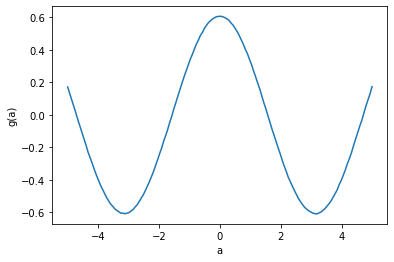

In [2]:
# This is the function we want to learn

a = np.array([-5., -4.93288591, -4.86577181, -4.79865772, -4.73154362, -4.66442953, -4.59731544, -4.53020134, -4.46308725, -4.39597315, -4.32885906, -4.26174497, -4.19463087, -4.12751678, -4.06040268,-3.99328859, -3.9261745 , -3.8590604 , -3.79194631, -3.72483221, -3.65771812, -3.59060403, -3.52348993, -3.45637584, -3.38926174, -3.32214765, -3.25503356, -3.18791946, -3.12080537, -3.05369128, -2.98657718, -2.91946309, -2.85234899, -2.7852349 , -2.71812081, -2.65100671, -2.58389262, -2.51677852, -2.44966443, -2.38255034, -2.31543624, -2.24832215, -2.18120805, -2.11409396, -2.04697987, -1.97986577, -1.91275168, -1.84563758, -1.77852349, -1.7114094 , -1.6442953 , -1.57718121, -1.51006711, -1.44295302, -1.37583893, -1.30872483, -1.24161074, -1.17449664, -1.10738255, -1.04026846, -0.97315436, -0.90604027, -0.83892617, -0.77181208, -0.70469799, -0.63758389, -0.5704698 , -0.5033557 , -0.43624161, -0.36912752, -0.30201342, -0.23489933, -0.16778523, -0.10067114, -0.03355705, 0.03355705,  0.10067114,  0.16778523,  0.23489933,  0.30201342, 0.36912752,  0.43624161,  0.5033557 ,  0.5704698 ,  0.63758389, 0.70469799,  0.77181208,  0.83892617,  0.90604027,  0.97315436, 1.04026846,  1.10738255,  1.17449664,  1.24161074,  1.30872483, 1.37583893,  1.44295302,  1.51006711,  1.57718121,  1.6442953 , 1.7114094 ,  1.77852349,  1.84563758,  1.91275168,  1.97986577, 2.04697987,  2.11409396,  2.18120805,  2.24832215,  2.31543624, 2.38255034,  2.44966443,  2.51677852,  2.58389262,  2.65100671, 2.71812081,  2.7852349 ,  2.85234899,  2.91946309,  2.98657718, 3.05369128,  3.12080537,  3.18791946,  3.25503356,  3.32214765, 3.38926174,  3.45637584,  3.52348993,  3.59060403,  3.65771812, 3.72483221,  3.79194631,  3.8590604 ,  3.9261745 ,  3.99328859, 4.06040268,  4.12751678,  4.19463087,  4.26174497,  4.32885906, 4.39597315,  4.46308725,  4.53020134,  4.59731544,  4.66442953, 4.73154362,  4.79865772,  4.86577181,  4.93288591,  5.])
E = np.array([ 0.17138883,  0.13155377,  0.09266184,  0.05297705,  0.01200516, -0.03049458, -0.06964844, -0.10844849, -0.14949461, -0.18709289, -0.23012359, -0.26328678, -0.29781801, -0.33479452, -0.36870269, -0.39984469, -0.43049895, -0.45621764, -0.48236581, -0.50761391, -0.52801575, -0.54848486, -0.56196756, -0.57738134, -0.58770728, -0.59622931, -0.6047725 , -0.60482736, -0.608268  , -0.605428  , -0.60127896, -0.5925451 , -0.58314955, -0.56721006, -0.5541315 , -0.53372239, -0.51376495, -0.49230113, -0.46739528, -0.44016795, -0.41178647, -0.37985213, -0.34943542, -0.31354069, -0.27758492, -0.23937499, -0.20482319, -0.16174477, -0.12705519, -0.08846874, -0.04471786, -0.00679984,  0.03775281,  0.07640407,  0.11798483, 0.15696982,  0.1970935 ,  0.23465746,  0.26958919,  0.30497392, 0.34091779,  0.37100161,  0.40324409,  0.43539834,  0.46000391, 0.48949364,  0.50773586,  0.53370937,  0.55125145,  0.56867388, 0.57950662,  0.59063341,  0.5982226 ,  0.60463891,  0.60548561, 0.60671776,  0.60325627,  0.597554  ,  0.59035387,  0.58143654, 0.56501968,  0.55109768,  0.53211048,  0.51203942,  0.48781832, 0.46160491,  0.43444864,  0.40275972,  0.3763892 ,  0.34137777, 0.30968816,  0.2704639 ,  0.2346102 ,  0.1959143 ,  0.16082068, 0.11703656,  0.07540899,  0.03820849, -0.00380251, -0.04604711, -0.0861876 , -0.12471619, -0.16445218, -0.2018229 , -0.23801759, -0.27790279, -0.3149851 , -0.34733572, -0.38425355, -0.41133142, -0.4391572 , -0.46544615, -0.48973995, -0.51538546, -0.5349615 , -0.552786  , -0.56889638, -0.58047118, -0.59033389, -0.59749108, -0.60469811, -0.6077889 , -0.6096588 , -0.60341732, -0.5984929 , -0.58745031, -0.57656074, -0.56119026, -0.54603436, -0.52854162, -0.50524848, -0.48364098, -0.45974356, -0.42632887, -0.4015899 , -0.36984184, -0.33644457, -0.298817  , -0.26682575, -0.23041349, -0.18718382, -0.14793281, -0.10841387, -0.0689196 , -0.03375066, 0.01069117,  0.05345579,  0.09239414,  0.12917887,  0.17367003])
plt.plot(a, E)
plt.xlabel('a')
plt.ylabel('g(a)')

In [3]:
# Network design
g = Sequential([Dense(H, 'relu', input_shape=(1,)),
                Dense(H, 'relu'),
                Dense(1)])

Θ = g.weights

In [4]:
def simulate():
    a = tf.random.uniform([batch_size, 1], -5, 5)

    # Random shock
    ϵ = tf.random.normal(shape=[batch_size, 1])

    # integrand
    f = tf.cos(a + ϵ)

    # Stochastic gradient descent
    loss = tf.reduce_mean((f - g(a))**2)

    return loss


# Training step
@tf.function
def train_step():
  optimizer.minimize(simulate, Θ)


In [5]:
# Training loop
for i in range(20000):
  train_step()

Text(0, 0.5, 'E[g]')

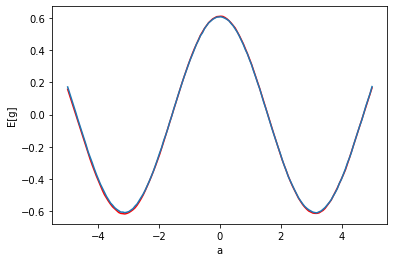

In [6]:
# Plots
plt.plot(a, g(a), color='r')
plt.plot(a, E)
plt.xlabel('a')
plt.ylabel('E[g]')

In [7]:
def loss_function(a):
    target = 0.1
    with tf.GradientTape() as tape:
        tape.watch(a)
        L = (g(a) - target)**2
    
    dL = tape.gradient(L, a)
    return L[0, 0], dL

In [8]:
start = tf.constant([0.])
optim_results = tfp.optimizer.bfgs_minimize(loss_function, initial_position=start)

In [9]:
a_star = optim_results.position
print(a_star)  # Should be close to 1.40

tf.Tensor([-1.4018234], shape=(1,), dtype=float32)


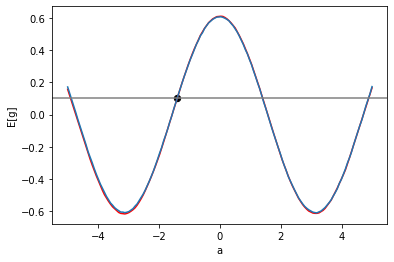

In [10]:
# Plots
plt.plot(a, g(a), color='r')
plt.plot(a, E)
plt.xlabel('a')
plt.ylabel('E[g]')
plt.scatter(a_star, g(a_star), color='k', s=40)
plt.axhline(.1, color='gray')

# a_star